In [1]:
#Importing needed libraries
import pandas as pd
import numpy as np
from skimage.io import imread_collection
import seaborn as sns
import matplotlib.pyplot as plt
print('Imported')

Imported


In [2]:
#Preparing Train data
images = np.array(imread_collection(r'Train\*.jpg'))
Train=np.zeros((2400, 784))
for i in range(len(images)):
    Train[i]=images[i].flatten()
Train = np.concatenate((Train.reshape(2400,784), np.ones((2400,1))), axis=1) 

In [3]:
#Reading the targets array
Labels = np.loadtxt(r'Train\Training Labels.txt', dtype=str)
Labels=Labels.astype(int) #convert the labels from txt to int

print('Read')

Read


In [4]:
#Calculates the target values for each class
def targetValues(Class,labels):
    target=np.array([])
    n=len(labels)
    for i in range(n):
            if(Class==labels[i]):
                target=np.append(target,[1])
                
            else:
                target=np.append(target,[-1])
    
    return target

targets=np.zeros((10,2400))
for i in range(10):
    targets[i]=targetValues(i,Labels)
    
# print(targets[0])    
# print(targets[9])

In [5]:
#Different values of learning rate
eta=[1,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8,10**-9]

In [6]:
#Calculates a specific w 
def perceptron(X, eta,t):
    w = np.zeros(len(X[0]))
    w[0]=1
    for i in range(500):
        for j,x in enumerate(X):
            if ((((w.T)@(X[j]))*t[j])<0): 
                w = w + (eta*(X[j])*t[j])
                break
            if(j==len(X)-1):
                return w
                
    return w

In [7]:
#Gets all weight vectors
def calcW(X,eta,eta_n,t):
    w_eta=np.array([perceptron(X, eta[eta_n],t[0])])
    for i in range(1,10):
        w_eta=np.append(w_eta,np.array([perceptron(X, eta[eta_n],t[i])]),axis=0)      
    return w_eta

W=np.array([calcW(Train,eta,0,targets)])
for i in range(1,10):
    W=np.append(W,np.array([calcW(Train,eta,i,targets)]),axis=0)

In [8]:
#Preparing test data
images_test = np.array(imread_collection(r'Test\*.jpg'))

Test=np.zeros((200, 784))
for i in range(len(images_test)):
    Test[i]=images_test[i].flatten()

In [9]:
#Reading the test targets array
Labels_Test = np.loadtxt(r'Test\Test Labels.txt', dtype=str)
Labels_Test = Labels_Test.astype(int) #convert the labels from txt to int

print('Read')

Read


In [10]:
#Calculates All the predictions
def calcPredictions(W,Test):
    predictions = np.array([np.zeros(200)])
    for i in range(10):
        predict = np.array([])
        for j in range(200):
            y=np.zeros(10)
            for k in range(10):
                y[k]=W[i][k][:784].T.dot(Test[j]) + W[i][k][784]
        
            predict = np.append(predict, [np.argmax(y)])
            
        if(i==0):
            predictions[0]=predict
        else:
            predictions=np.append(predictions,[predict],axis=0)
            
    return predictions.astype(int)

predictions=calcPredictions(W,Test)

In [11]:
#Calculates All Confusion Matrices
def confusionMatrix(Y,Predictions):
    allMatrices=np.array([np.zeros((10,10))])
    for i in range(10):
        cm=np.zeros((10,10))
        for j in range(200):
            if Y[j]==Predictions[i][j]:
                cm[Y[j]][Y[j]]+=1
            else:
                cm[Predictions[i][j]][Y[j]]+=1
        
        if(i==0):
            allMatrices[0]=cm
        else:
            allMatrices=np.append(allMatrices,[cm],axis=0)
    
    return allMatrices

allMatrices=confusionMatrix(Labels_Test,predictions)

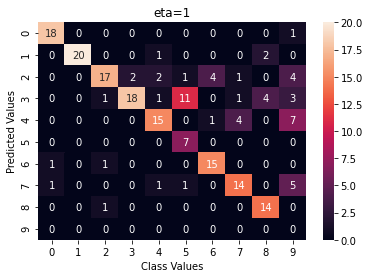

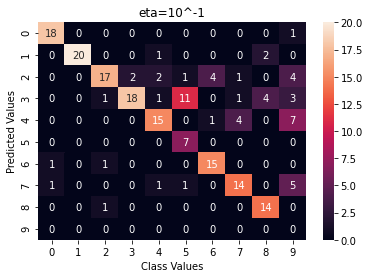

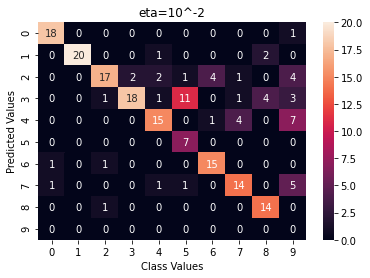

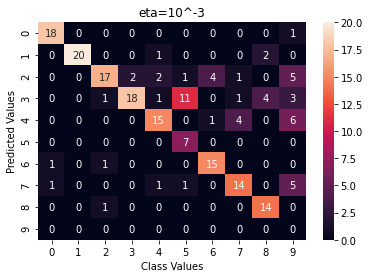

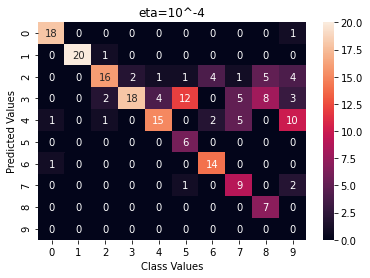

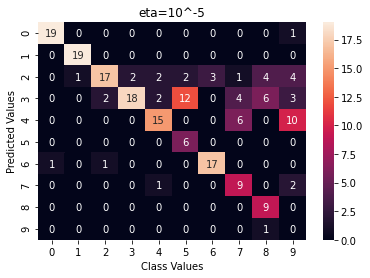

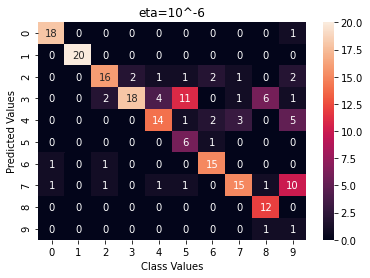

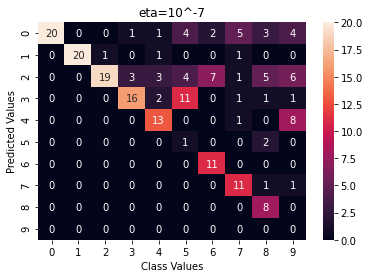

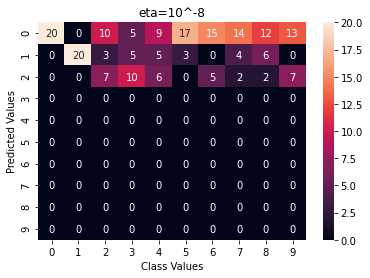

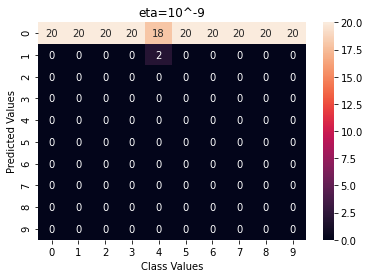

In [12]:
#Displays and saves all heatmaps
def heatMaps(allMatrices):
    for i in range(10):
        cm=allMatrices[i]
        cm = pd.DataFrame(cm, index = ['0','1','2','3','4','5','6','7','8','9'], columns = ['0','1','2','3','4','5','6','7','8','9'])

        sns.heatmap(cm, annot=True)
        
        if(i==0):
            
            plt.title('eta=1')
            
        else:
            plt.title('eta=10^-'+str(i))
            
        plt.xlabel('Class Values')
        plt.ylabel('Predicted Values')
        plt.savefig('Confusion-'+str(i)+'.jpg')
        plt.show()
        
        
heatMaps(allMatrices)        